참조 
https://velog.io/@top6421/EDA%EA%B3%BC%EC%A0%9C1-%EC%9D%B4%EB%94%94%EC%95%BC%EB%8A%94-%EC%A0%84%EB%9E%B5%EC%A0%81%EC%9C%BC%EB%A1%9C-%EC%8A%A4%ED%83%80%EB%B2%85%EC%8A%A4-%EA%B7%BC%EC%B2%98%EC%97%90-%EB%A7%A4%EC%9E%A5%EC%9D%84-%EB%82%BC%EA%B9%8C

In [3]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import re
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

from selenium.webdriver.common.by import By

In [4]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = './fonts/NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

C:\Users\perso\AppData\Local\Temp\ipykernel_33548\3155896616.py:4: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


스타벅스의 매장 홈페이지를 연다

In [5]:
star_url ="https://www.starbucks.co.kr/store/store_map.do"
driver = webdriver.Chrome('./chromedriver.exe')
driver.get(star_url)

C:\Users\perso\AppData\Local\Temp\ipykernel_33548\4245863292.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


지역검색 > 서울 > 전체 순으로 들어가도록 한다.
오류가 발생하여 각 코드마다 2초에 텀을 준다.

In [6]:
driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)
driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
driver.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

주소를 soup에 담고 서울에 있는 총 매장의 수와 표본을 확인한다.
총 588개의 매장이 수집됨

In [8]:
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

표본을 보고 어떤식으로 데이터를 저장할지 코드를 구상한다.

In [9]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

for 문을 이용하여 전체 데이터의 가게명, 주소, 구 정보를 저장하고 저장된 정보의 길이를 확인하여 588개의 매장 모두 저장되었는지 확인한다.

In [10]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

for 문을 이용하여 전체 데이터의 가게명, 주소, 구 정보를 저장하고 저장된 정보의 길이를 확인하여 585개의 매장 모두 저장되었는지 확인한다.

In [11]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [12]:
df_star.head()

,가게명,구,주소
0,역삼아레나빌딩,강남구,서울특별시 강남구 언주로 425 (역삼동)
1,논현역사거리,강남구,서울특별시 강남구 강남대로 538 (논현동)
2,신사역성일빌딩,강남구,서울특별시 강남구 강남대로 584 (논현동)
3,국기원사거리,강남구,서울특별시 강남구 테헤란로 125 (역삼동)
4,대치재경빌딩R,강남구,서울특별시 강남구 남부순환로 2947 (대치동)


DataFrame에 저장후 정렬, tail을 통하여 모든 데이터가 들어갔는지 한번 더 확인.

In [13]:
gu_list = list(set(df_star["구"]))
gu_list

['영등포구',
 '동대문구',
 '강서구',
 '서대문구',
 '광진구',
 '관악구',
 '노원구',
 '송파구',
 '중구',
 '종로구',
 '동작구',
 '성동구',
 '강동구',
 '은평구',
 '서초구',
 '강북구',
 '양천구',
 '중랑구',
 '구로구',
 '성북구',
 '도봉구',
 '강남구',
 '금천구',
 '마포구',
 '용산구']

이디야 검색

In [14]:
edi_url = "https://www.ediya.com/contents/find_store.html"
driver = webdriver.Chrome('./chromedriver.exe')
driver.get(edi_url)

C:\Users\perso\AppData\Local\Temp\ipykernel_33548\3587683499.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver.exe')


이디야 매장 검색 페이지를 연다.
이디야 매장은 직접 구를 입력해 줘야 함으로 스타벅스 매장 수집때 만든 구 리스트를 활용하여 검색한다.

또한 그냥 구만 입력하였을시 위 사진과 같은 확인창이 떠 모든 데이터 수집이 멈춘다. 서울 + 구 명으로 입력하도록 코드 수정하기로 하였다.

In [16]:
driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
driver.find_element(By.XPATH, '//*[@id="keyword"]').clear
driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 강남구")
driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()

html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info

[<li class="item"><a href="#c" onclick="panLatTo('0','0','0');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남YMCA점</dt> <dd>서울 강남구 논현동</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.0401601992311','37.51654171724045','1');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남구청역아이티웨딩점</dt> <dd>서울 강남구 학동로 338 (논현동, 강남파라곤)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.02810578707652','37.51408005446769','2');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남논현학동점</dt> <dd>서울 강남구 논현로131길 28 (논현동)</dd></dl></a></li>,
 <li class="item"><a href="#c" onclick="panLatTo('127.05242928262568','37.50133876179308','3');fnMove();"><div class="store_thum"><img src="../images/customer/store_thum.gif"/></div><dl><dt>강남대치점</dt> <dd>서울 강남구 역삼로 415 (대치동, 성진빌딩)</dd></dl></a></li>,
 <li class="item"><a href="#c" onc

서울 강남구를 표본으로 데이터가 잘 수집되는지 확인한다.

In [17]:
edi_info = []



for gu in gu_list:
    driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    driver.find_element(By.XPATH, '//*[@id="keyword"]').clear
    driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + gu)
    driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button').click()
    
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

751

for 문을 이용하여 각 구별 매장을 저장하고 길이를 통하여 매장 수를 확인한다. 총 741개의 매장이 저장되었다.

In [18]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
746,합정홈플러스점,마포구,"서울 마포구 양화로 45 (서교동, 메세나폴리스)"
747,홍대중앙점,마포구,서울 마포구 양화로 124 (서교동)
748,홍대청기와점,마포구,서울 마포구 월드컵북로 7 (서교동)
749,홍대학원가점,마포구,서울 마포구 와우산로 148 (창전동)
750,홍익대점,마포구,"서울 마포구 홍익로 10 (서교동, 서교푸르지오)"


이디야 정보를 DataFrame에 저장하고 tail을 통하여 모든 데이터가 들어갔는지 확인한다.

## 구별 매장 수 확인 및 차이 구하기

- 스타벅스 데이터

In [19]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,영등포구,41
1,동대문구,9
2,강서구,26
3,서대문구,21
4,광진구,19
5,관악구,12
6,노원구,13
7,송파구,34
8,중구,53
9,종로구,39


위에서 수집한 스타벅스 데이터중 구와 매장수 정보만 가져와 새 데이터 프레임을 만든다.

In [20]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,영등포구,41
1,동대문구,25
2,강서구,45
3,서대문구,21
4,광진구,24
5,관악구,28
6,노원구,31
7,송파구,39
8,중구,29
9,종로구,31


매장수 차이 데이터

In [21]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,영등포구,41,41,0
1,동대문구,25,9,16
2,강서구,45,26,19
3,서대문구,21,21,0
4,광진구,24,19,5
5,관악구,28,12,16
6,노원구,31,13,18
7,송파구,39,34,5
8,중구,29,53,-24
9,종로구,31,39,-8


### 데이터 시각화

c:\DEV\Langs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


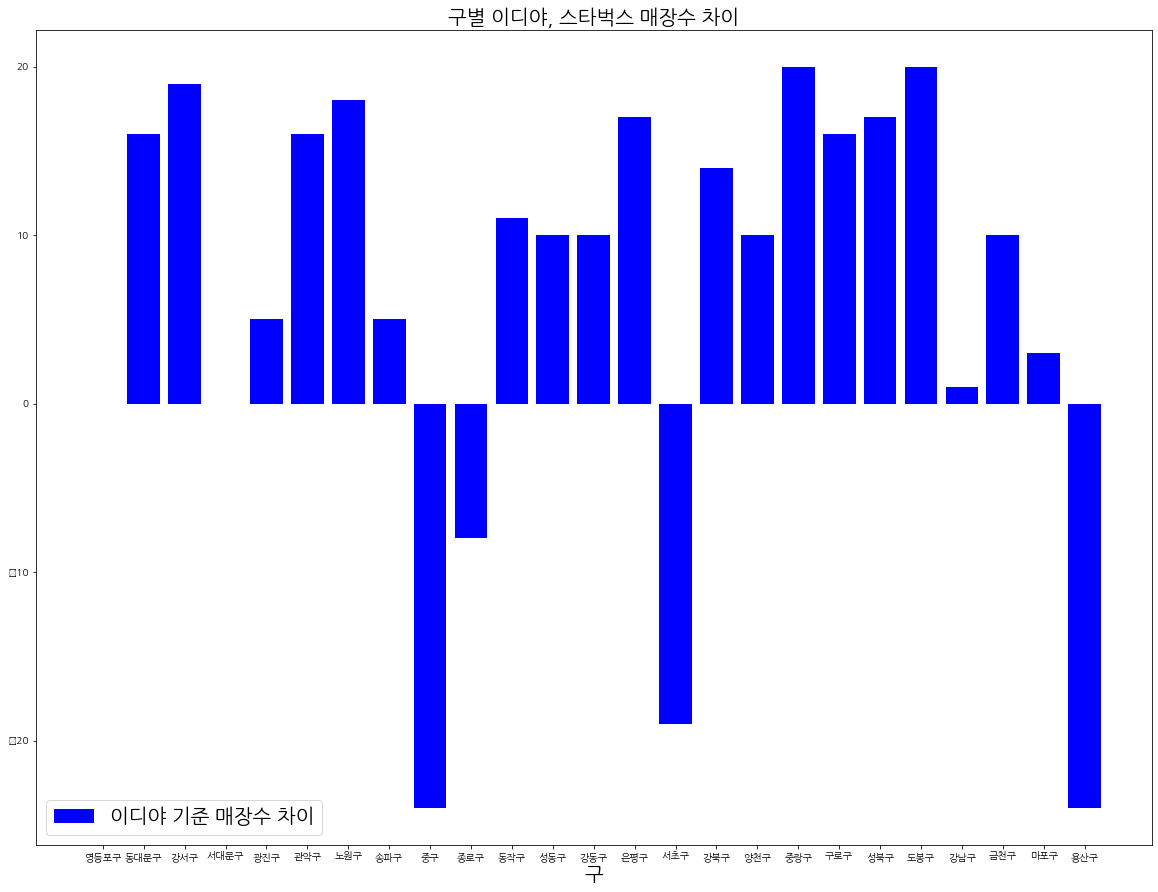

In [22]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()